# Lineární advekce

Nechť $a \in \mathbb R$ a $u \in \mathbb C^1( \mathbb R^2 \to \mathbb R)$. Potom rovnici
\begin{equation}
  \frac{\partial u(x,t)}{\partial t} + a \frac{\partial u(x,t)}{\partial x} = 0
\end{equation}
nazveme **rovnicí lineární advekce**.


## Počáteční úloha pro rovnici lineární advekce

Nechť $a \in \mathbb R$ a $u_0 \in \mathbb C^1(\mathbb R \to \mathbb R)$. **Počáteční úlohou** pro rovnici advekce pak rozumíme nalézt funkci $u \in \mathbb C^1( \mathbb R\times [0,+\infty) \to \mathbb R)$ takovou, že $\forall x \in \mathbb R, \forall t>0$ je splněna rovnice 
\begin{equation}
  \frac{\partial u(x,t)}{\partial t} + a \frac{\partial u(x,t)}{\partial x} = 0
\end{equation}
a navíc je $u(x,0)=u_0(x)$.


### Analytické řešení počáteční úlohy
Analytické řešení je možné získat například pomocí metody charakteristik. Uvažujme v rovině $x-t$ nějakou křivku $x = \xi(t)$. Potom
$$
\frac{d u(\xi(t),t)}{t} = \frac{\partial u}{\partial x} \frac{d\xi}{dt} + \frac{\partial u}{\partial t}
$$
a tedy pokud $d\xi/dt = a$, je $du(xi(t),t)/dt=0$ a $u$ je na této křivce konstantní. 
Křivky splňující rovnici $d\xi/dt=a$ nazýváme **charakteristikami rovnice advekce**.
Charakteristiky jsou polopřímky $x = x_0 + a t$ a analytické řešení počáteční úlohy je 
$$
    u(x,t) = u_0(x-at).
$$


### Numerické řešení počáteční úlohy pro rovnici advekce metodou sítí

In [1]:
using PyPlot

In [4]:
Nx = 26;                   # Pocet bodu site na intervalu [0,1]

x = linspace(0,1,Nx);      # Souradnice bodu site


function u0(x)             # Definice pocatecni podminky"""
    if x<0.25 || x>0.75 
        return 0
    else
        return cos( 2*(2*x-1.0) * π ) + 1
    end
end;      

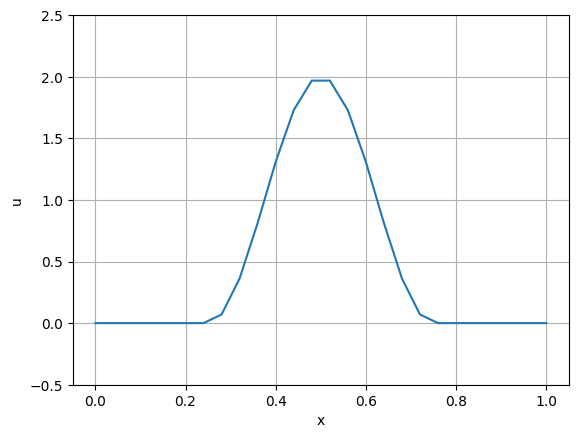

In [5]:
plot(x,[u0(xi) for xi in x]);
ylim(-0.5,2.5); grid(true); xlabel("x"); ylabel("u");

**Protiproudové (upwind) schéma**

In [11]:
a = 1;                  # Rychlost advekce

dx = 1.0 / (Nx-1);      # Velikost prostoroveho 
dt = 0.5 * dx / abs(a)  # Velikost casoveho kroku

u    = [u0(xi) for xi in x]
uNew = copy(u)

t = 0

pocet_iteraci = round(Int, 0.2 / dt) # Vypocet provedeme do casu priblizne 0.2

for n = 1:pocet_iteraci

    for i=2:Nx
        uNew[i] = u[i] - a * dt / dx * (u[i] - u[i-1])
    end
    
    t = t + dt
    u = copy(uNew)
end

u_upwind = copy(u);

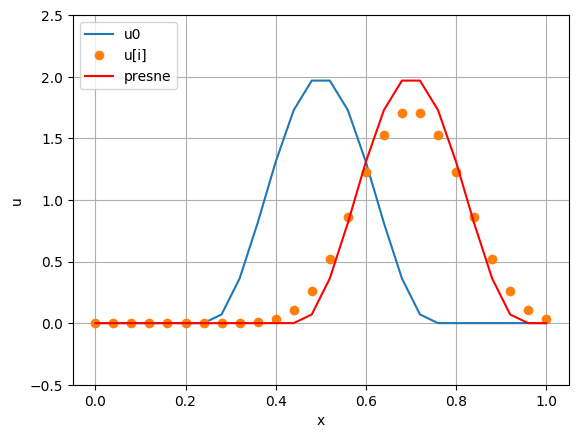

In [12]:
plot(x, [u0(xi) for xi in x], label="u0")
plot(x,u, "o", label="u[i]");
plot(x, [u0(xi-a*t) for xi in x], "-r", label="presne")
ylim(-0.5,2.5); grid(true); xlabel("x"); ylabel("u"); legend(loc="upper left");

**Laxovo-Friedrichsovo (Rusanovovo) schéma**

In [15]:
u    = [u0(xi) for xi in x]
uNew = copy(u)

t = 0

for n = 1:pocet_iteraci

    for i = 2:Nx-1
        uNew[i] = (u[i+1]+u[i-1])/2.0  - a * dt / (2*dx) * (u[i+1] - u[i-1])
    end
    t = t + dt
    u = copy(uNew)
end

u_lf = copy(u);

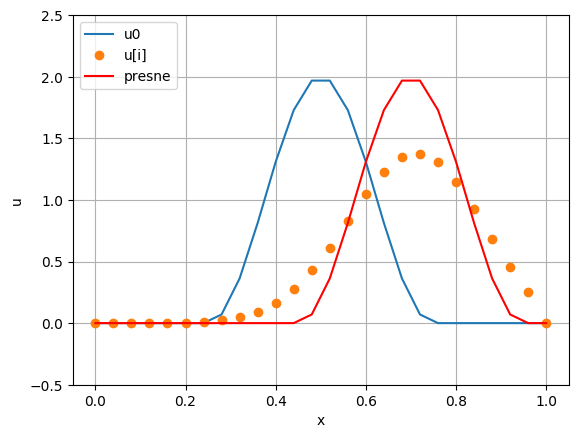

In [17]:
plot(x, [u0(xi) for xi in x], label="u0")
plot(x,u_lf, "o", label="u[i]");
plot(x, [u0(xi-a*t) for xi in x], "-r", label="presne")
ylim(-0.5,2.5); grid(true); xlabel("x"); ylabel("u"); legend(loc="upper left");

**Laxovo-Wendroffovo schéma**

In [21]:
u    = [u0(xi) for xi in x]
uNew = copy(u)

t = 0

pocet_iteraci = round(Int, 0.2 / dt) # Vypocet provedeme do casu priblizne 0.2

for n = 1:pocet_iteraci

    for i = 2:Nx-1:
        uNew[i] = u[i] - a * dt / (2*dx) * (u[i+1] - u[i-1]) + (a*dt/dx)**2/2 * (u[i+1]-2*u[i]+u[i-1])
    end
    
    t = t + dt
    u = copy(uNew)
end

u_lw = copy(u);

LoadError: [91msyntax: line break in ":" expression[39m

In [19]:
plot(x, [u0(xi) for xi in x], label="u0")
plot(x,u, "o", label="u[i]");
plot(x, [u0(xi-a*t) for xi in x], "-r", label="presne")
ylim(-0.5,2.5); grid(True); xlabel("x"); ylabel("u"); legend(loc="upper left");

LoadError: [91msyntax: line break in ":" expression[39m